# Exploring UCLA Admissions Data

Python Code to analyze UCLA admissions data.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading Data from CSV file and creating a data frame.Using admission.csv file as our source raw data.

In [30]:
df = pd.read_csv('../data/admissions.csv')
df.head(5)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


Data Dictionary

In [101]:
df.columns

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

    Admit:    Admission decision.Binary values ( 0 or 1) 1 = Admit 0 = Not Admit
    GRE:      GRE score of applicant. Int Value (100 to 800)
    GPA:      GPA of applicant. float value (1.0 to 4.0)
    Prestige: University Ranking. int value ( 1 to 4)

Describe the nature of the source data and Show the co-relation between columns

In [31]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [49]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


What are the averages of students?

In [102]:
print("Avg GRE score of all Students:",np.average(df.gre))
print("Avg GPA score of all Students:",np.average(df.gpa))

Avg GRE score of all Students: 587.858942065
Avg GPA score of all Students: 3.3922418136


In [54]:
df =df.dropna()

In [60]:
df_accept = df[df.admit == 1]
df_reject = df[df.admit != 1]

print("Avg GRE score of accepted Students:",np.average(df_accept.gre))
print("Avg GPA score of accepted Students:",np.average(df_accept.gpa))

print("Avg GRE score of rejected Students:",np.average(df_reject.gre))
print("Avg GPA score of rejected Students:",np.average(df_reject.gpa))



Avg GRE score of accepted Students: 618.571428571
Avg GPA score of accepted Students: 3.48920634921
Avg GRE score of rejected Students: 573.579335793
Avg GPA score of rejected Students: 3.34715867159


Explaining the Data with little Visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cdedeb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cec9b70>]], dtype=object)

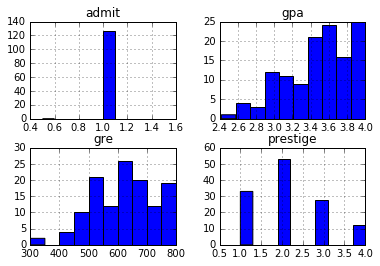

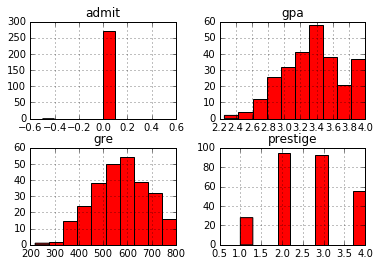

In [56]:
df_accept.hist()
df_reject.hist(color = 'r')

Conclusion so far: 

For admitted students:

        Admit changes improves when GPA > 3.4 and GRE > 600
        Most applied in prestige 2 universities followed by prestige 1.
        
For not-admitted students:

        Most of them had good GRE close to 600 but GPA few had GPA > 3.4. GPA played a big adverse role for them.
        Most of them applied in universities of prestige 2 or 3. 
    
    
    

Now analyzing if sucessful ( admit = 1) student had a correlation between GRE and GPA scores

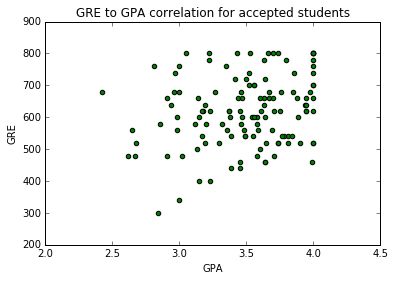

In [103]:
plt.scatter(df_accept['gpa'], df_accept['gre'], c='g')
plt.xlabel('GPA')
plt.ylabel('GRE')
plt.title('GRE to GPA correlation for accepted students')
#plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12021aeb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12035e518>]], dtype=object)

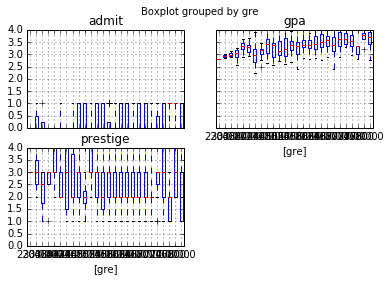

In [104]:
df.boxplot(by='gre')

Boxplot isnt very informative in this case. 

In [65]:
df_prestige1 = df_accept[df_accept.prestige == 1]
df_prestige2 = df_accept[df_accept.prestige == 2]
df_prestige3 = df_accept[df_accept.prestige == 3]
df_prestige4 = df_accept[df_accept.prestige == 4]
print("Avg GRE score of accepted Students and prestige =1:",np.average(df_prestige1.gre))
print("Avg GRE score of accepted Students and prestige =2:",np.average(df_prestige2.gre))
print("Avg GRE score of accepted Students and prestige =3:",np.average(df_prestige3.gre))
print("Avg GRE score of accepted Students and prestige =4:",np.average(df_prestige4.gre))


Avg GRE score of accepted Students and prestige =1: 636.363636364
Avg GRE score of accepted Students and prestige =2: 612.075471698
Avg GRE score of accepted Students and prestige =3: 616.428571429
Avg GRE score of accepted Students and prestige =4: 603.333333333


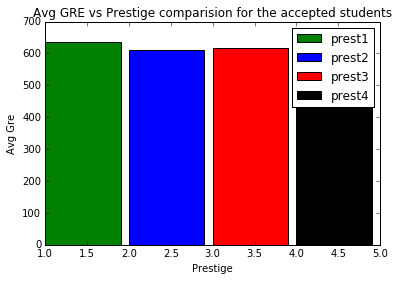

In [106]:
plt.bar(np.average(df_prestige1.prestige),np.average(df_prestige1.gre),label = 'prest1',color='g',width = .9)
plt.bar(np.average(df_prestige2.prestige),np.average(df_prestige2.gre),label = 'prest2',color='b',width = .9)
plt.bar(np.average(df_prestige3.prestige),np.average(df_prestige3.gre),label = 'prest3',color='r',width = .9)
plt.bar(np.average(df_prestige4.prestige),np.average(df_prestige4.gre),label = 'prest4',color='k',width = .9)
plt.xlabel('Prestige')
plt.ylabel('Avg Gre')
plt.title('Avg GRE vs Prestige comparision for the accepted students')
plt.legend()

plt.show()


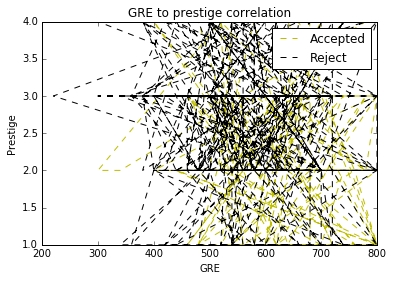

In [114]:
plt.plot((df_accept.gre),(df_accept.prestige),'b--',label = 'Accepted',color='y')
plt.plot((df_reject.gre),(df_reject.prestige),'b--',label = 'Reject',color='k')
plt.xlabel('GRE')
plt.ylabel('Prestige')
plt.title('GRE to prestige correlation')
plt.legend()
plt.show()

So far:
The data isnt giving much information so far. however if we group the data based on the prestige and admit type we get a better picture. Grouping below shows how a combination of GRE and GPA is deciding factor for admit or no admit.

In [121]:
df.groupby(['prestige']).mean()

,admit,gre,gpa
prestige,,,
1.0,0.540984,611.803279,3.453115
2.0,0.358108,596.621622,3.367365
3.0,0.231405,574.876033,3.432893
4.0,0.179104,570.149254,3.318358


In [123]:
df.groupby(['admit','prestige']).mean()

gre       gpa
admit prestige                      
0     1.0       582.857143  3.345714
      2.0       588.000000  3.325895
      3.0       562.365591  3.402258
      4.0       562.909091  3.291455
1     1.0       636.363636  3.544242
      2.0       612.075472  3.441698
      3.0       616.428571  3.534643
      4.0       603.333333  3.441667